In [ ]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# Datasets

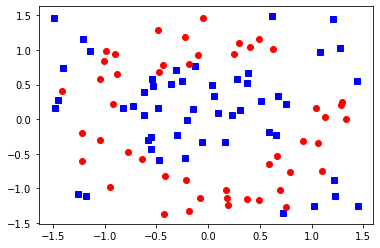

In [ ]:
# dataset 1
np.random.seed(123)
n = 100
x_d1 = 3 * (np.random.rand(n, 2)-0.5)
radius = x_d1[:,0]**2 + x_d1[:,1]**2
y_d1 = (radius > 0.7 + 0.1 * np.random.randn(n)) &( radius < 2.2 + 0.1 * np.random.randn(n))
y_d1 = 2 * y_d1 -1

plt.plot(x_d1[y_d1 < 0, 0],  x_d1[y_d1 < 0, 1], 'bs')
plt.plot(x_d1[y_d1 > 0, 0],  x_d1[y_d1 > 0, 1], 'ro')

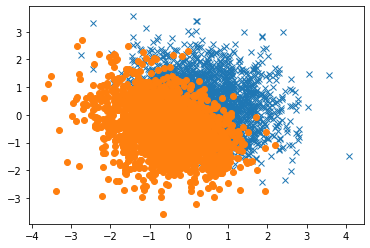

In [ ]:
# dataset 2
n = 4000
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x_d2 = np.random.randn(n, 2) + 0
y_d2 = 2 * (omega * x_d2[:,0] + x_d2[:,1] + noise > 0) - 1

plt.plot(np.extract(y_d2>0,x_d2[:,0]),np.extract(y_d2>0,x_d2[:,1]), 'x')
plt.plot(np.extract(y_d2<0,x_d2[:,0]),np.extract(y_d2<0,x_d2[:,1]), 'o')

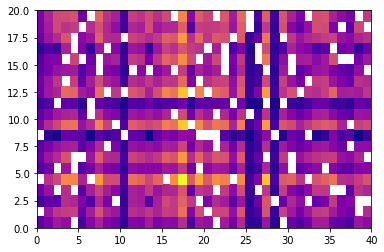

In [ ]:
#dataset3
np.random.seed(1234)
m = 20
n = 40
r = 2
A = np.dot(np.random.rand(m, r), np.random.rand(r, n)).flatten()
ninc = 100
Q = np.random.permutation(m * n)[:ninc]
A[Q] = None
A = A.reshape(m, n)

plt.pcolor(A, cmap=plt.cm.plasma)

In [ ]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [ ]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [ ]:
# dataset 6
d_d6 = 200
n_d6 = 180

# we consider 5 groups where each group has 40 attributes
groupSize = 5
attrSize = 40
g_d6 = np.arange(groupSize*attrSize).reshape(groupSize,-1)

x_d6 = np.random.randn(n_d6, d_d6)
noise_d6 = 0.5

# we consider feature in group 1 and group 2 is activated.
w_d6 = np.vstack([20 * np.random.randn(80, 1),
                 np.zeros((120, 1)),
                 5 * np.random.rand()])
x_d6_tilde = np.hstack([x_d6, np.ones((n_d6, 1))])
y_d6 = np.dot(x_d6_tilde, w_d6) + noise_d6 * np.random.randn(n_d6, 1)

# Problem 1

## 1 Steepest Gradient Method

In [78]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy

In [79]:
loss_hist_batch = [] # to store the history of loss J(w_t)

# parameters
n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
x = np.hstack([x, np.ones((n, 1))])
dim = 5
y = (2 * x[:, 0].reshape((n, 1)) - 1 * x[:, 1].reshape((n, 1)) + 0.5 + 0.5 * np.random.randn(n, 1)) > 0
y = 2 * y - 1
lam = 2
alpha = 0.1
aim = 1e-7

print(np.shape(x))
print(np.shape(y))

# steepest gradient method
print("--- steepest gradient method ---")
w = np.ones((dim, 1))

print(np.shape(w))
step = 1
while 1:
  grad = 2 * lam * w
  func = lam * np.dot(w.T,w)
  for i in range(n):
    xi = x[i].reshape(dim,1)
    yi = y[i].reshape(1,1)
    exp = np.exp(-yi * np.dot(w.T,xi))
    grad += -exp/(1+exp)*yi*xi
    func += np.log(1 + exp)
  w -= grad * alpha / np.sqrt(step+20)
  loss_hist_batch.append(np.asscalar(func))
  step += 1
  if np.linalg.norm(grad) < aim:
    break
print("step:",end="")
print(step)
print(w)


(200, 5)
(200, 1)
--- steepest gradient method ---
(5, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


step:140
[[ 2.48961218]
 [-1.22418728]
 [-0.02168388]
 [-0.04665154]
 [ 0.61975767]]


## 2 Newton method

In [80]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement Newton based method here

# --- newton method ---
print("--- newton method ---")
w = np.ones((dim,1))
step = 1
while 1:
  grad = 2 * lam * w
  hessian = 2 * lam * np.eye(5)
  func = lam * np.dot(w.T, w)
  for i in range(n):
    xi = x[i].reshape(dim, 1)
    yi = y[i].reshape(1,1)
    exp = np.exp(-yi * np.dot(w.T, xi))
    pi = 1/(1+exp)
    grad += -exp/(1 + exp)*xi*yi
    hessian += pi*(1-pi)*np.dot(xi, xi.T) * yi**2
    func += np.log(1 + exp)
  d = -np.dot(np.linalg.inv(hessian), grad)
  w = w + d/np.sqrt(step)

  loss_hist_newton.append(np.asscalar(func))
  step +=1
  if np.linalg.norm(d) < aim:
    break
print("step:",end="")
print(step)
print(w)

--- newton method ---


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


step:74
[[ 2.48961212]
 [-1.22418726]
 [-0.0216839 ]
 [-0.04665156]
 [ 0.61975764]]


##3 Campare Steepset Gradient Method and Newton method

--- compare ---


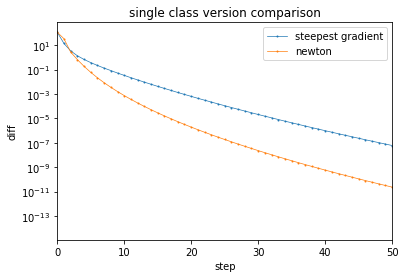

In [81]:
# plot the result

print("--- compare ---")
plt.yscale('log')
plt.xlabel('step')
plt.ylabel('diff')
plt.title('single class version comparison')
tmp1 = loss_hist_batch[len(loss_hist_batch)-1]
loss_hist_batch -= tmp1*np.ones((len(loss_hist_batch)))
loss_hist_batch = np.delete(loss_hist_batch,len(loss_hist_batch)-1)
plt.plot(np.arange(0, len(loss_hist_batch), 1), loss_hist_batch,marker="o",markersize=1,linewidth=0.7,label="steepest gradient")

tmp2 = loss_hist_newton[len(loss_hist_newton)-1]
loss_hist_newton -= tmp2*np.ones((len(loss_hist_newton)))
loss_hist_newton = np.delete(loss_hist_newton,len(loss_hist_newton)-1)
plt.plot(np.arange(0, len(loss_hist_newton), 1), loss_hist_newton,marker="o",markersize=1,linewidth=0.7,label="newton")
plt.xlim(0, 50)
plt.legend()
plt.show()

##4 Multilayer version of SGM and Newton Method

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


step:0 15.50185965327938 1.0687443142095665
step:1 6.199884227780951 1.0687443142095665
step:2 3.569300948135674 1.0687443142095665
step:3 2.3327769802761518 1.0687443142095665
step:4 1.63290127915367 1.0687443142095665
step:5 1.1947229725563628 1.0687443142095665
step:6 0.9020611122611439 1.0687443142095665
step:7 0.6974824652700979 1.0687443142095665
step:8 0.5495169033519323 1.0687443142095665
step:9 0.4396084087092997 1.0687443142095665
step:10 0.3561948484368594 1.0687443142095665
step:11 0.29175400039669414 1.0687443142095665
step:12 0.2412186238712183 1.0687443142095665
step:13 0.20107580394218647 1.0687443142095665
step:14 0.16883068603477222 1.0687443142095665
step:15 0.14267455978555713 1.0687443142095665
step:16 0.12127258982053334 1.0687443142095665
step:17 0.10362420544790125 1.0687443142095665
step:18 0.08896902018423247 1.0687443142095665
step:19 0.07672206938245417 1.0687443142095665
step:20 0.0664283834735731 1.0687443142095665
step:21 0.05773058592701022 1.06874431420

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


step:1 0.7945535432309212 1.0687443142095665
step:2 0.2628507736828565 1.0687443142095665
step:3 0.11927281480850672 1.0687443142095665
step:4 0.06285986713216418 1.0687443142095665
step:5 0.036270821217577805 1.0687443142095665
step:6 0.02226678634374753 1.0687443142095665
step:7 0.014308061020854563 1.0687443142095665
step:8 0.009524637094594189 1.0687443142095665
step:9 0.006522699147443627 1.0687443142095665
step:10 0.004572513587005433 1.0687443142095665
step:11 0.0032690964916161835 1.0687443142095665
step:12 0.002376942626640601 1.0687443142095665
step:13 0.0017537403682310966 1.0687443142095665
step:14 0.001310679011758182 1.0687443142095665
step:15 0.0009907931963530827 1.0687443142095665
step:16 0.0007566670520924869 1.0687443142095665
step:17 0.0005832104997104568 1.0687443142095665
step:18 0.0004532882194105132 1.0687443142095665
step:19 0.00035500552319630473 1.0687443142095665
step:20 0.0002799841468018732 1.0687443142095665
step:21 0.00022224441683306787 1.06874431420956

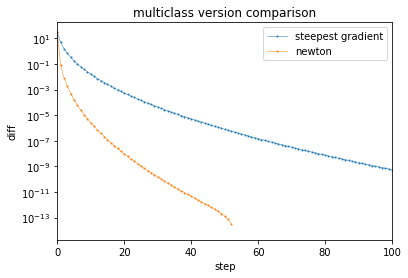

[3.00357222e+01 4.80448060e+00 1.59238901e+00 6.80192070e-01
 3.33278025e-01 1.78411402e-01 1.01709431e-01 6.08074592e-02
 3.77444607e-02 2.41559345e-02 1.58587079e-02 1.06396363e-02
 7.27302983e-03 5.05375096e-03 3.56284930e-03 2.54441651e-03
 1.83831883e-03 1.34220343e-03 9.89404527e-04 7.35761798e-04
 5.51574662e-04 4.16590321e-04 3.16823710e-04 2.42505936e-04
 1.86740488e-04 1.44610755e-04 1.12579650e-04 8.80809524e-05
 6.92380838e-05 5.46686181e-05 4.33470835e-05 3.45078274e-05
 2.75756688e-05 2.21160042e-05 1.77986436e-05 1.43714182e-05
 1.16407913e-05 9.45752664e-06 7.70603245e-06 6.29639345e-06
 5.15838182e-06 4.23693230e-06 3.48870708e-06 2.87947591e-06
 2.38210919e-06 1.97503392e-06 1.64104121e-06 1.36636141e-06
 1.13994437e-06 9.52897173e-07 7.98043349e-07 6.69576300e-07
 5.62785796e-07 4.73841520e-07 3.99621242e-07 3.37574030e-07
 2.85611034e-07 2.42018067e-07 2.05385430e-07 1.74551454e-07
 1.48556958e-07 1.26608420e-07 1.08048133e-07 9.23299632e-08
 7.89996157e-08 6.767853

In [82]:
# steepest gradient method, multilayer version

import numpy as np
import matplotlib.pyplot as plt

# datasets
n = 200
dim = 5
class_num = 3
x = 3 * (np.random.rand(n, 4) - 0.5)
x = np.hstack([x, np.ones((n, 1))])
W = np.array([[2, -1, 0.5], [-3, 2, 1], [1, 2, 3]])
x_with_error = np.dot(np.hstack([x[:, 0:2].reshape((n, 2)), np.ones((n, 1))]), W.T) + 0.5 * np.random.randn(n, 3)
maxlogit, y = x_with_error.max(axis=1), x_with_error.argmax(axis=1)

# parameter
lam = 2
alpha = 0.15
w = np.ones((dim, 3))

# steepest gradient method
loss_hist_batch = []
step = 0
while 1:
    grad = np.zeros_like(w)
    obj_fun = lam * np.trace(np.dot(w.T, w))
    L = 0
    for i in range(n):
        yi = y[i].reshape((1, 1))
        xi = x[i].reshape((dim, 1))
        exp = np.exp(np.dot(w.T, xi) - np.max(np.dot(w.T, xi)))
        softmax = exp / np.sum(exp)
        for j in range(class_num):
            if j == yi:
                grad[:, yi] += ((softmax[yi] - 1).reshape((1, 1)) * xi).reshape((5, 1, 1))
            else:
                grad[:, j] += (softmax[j].reshape((1, 1)) * xi).reshape((5,))
        L -= (np.log(softmax[yi]))
    grad = grad/n + 2 * lam * w
    obj_fun += L/n
    loss_hist_batch.append(np.asscalar(obj_fun))
    print(f'step:{step} {np.linalg.norm(grad)} {np.asscalar(obj_fn)}')
    if (np.linalg.norm(grad) < 1e-6):
        break
    w -= alpha/np.sqrt(step+1) * grad
    step += 1

print("\n---finished steepest gradient method---")
print(f'step : {step}')
print(f'w : {w}')


# Newtom method, multilayer version

w = np.ones((dim, 3))
step = 0
loss_hist_newton = []
while 1:
    hessian = [np.zeros((5, 5)), np.zeros((5, 5)), np.zeros((5, 5))]
    grad = np.zeros_like(w)
    obj_fun = lam * np.trace(np.dot(w.T, w))
    L = 0
    for i in range(n):
        yi = y[i].reshape((1, 1))
        xi = x[i].reshape((5, 1))
        exps = np.exp(np.dot(w.T, xi) - np.max(np.dot(w.T, xi)))
        softmax = exps / np.sum(exps)
        for j in range(class_num):
            if (j == yi):
                grad[:, yi] += ((softmax[yi] - 1).reshape((1, 1)) * xi).reshape((5, 1, 1))
            else:
                grad[:, j] += (softmax[j].reshape((1, 1)) * xi).reshape((5,))
            hessian[j] += (1 - softmax[j]) * softmax[j] * np.dot(xi, xi.T)
        L -= (np.log(softmax[yi]))
    for j in range(class_num):
        hessian[j] = hessian[j]/n + 2 * lam * np.eye(5)
    grad /= n
    grad += 2 * lam * w
    L /= n
    obj_fun += L
    loss_hist_newton.append(np.asscalar(obj_fun))
    print(f'step:{step} {np.linalg.norm(grad)} {np.asscalar(obj_fn)}')
    if (np.linalg.norm(grad) < 1e-6):
        break
    for j in range(class_num):
        d = np.dot(np.linalg.inv(hessian[j]), grad[:, j])
        w[:, j] -= d * 1 / np.sqrt(step+1)
    step += 1

print("\n---finished newton method---")
print(f'step : {step}')
print(f'w : {w}')

# compare
plt.yscale('log')
plt.xlabel('step')
plt.ylabel('diff')
plt.title('multiclass version comparison')
tmp = loss_hist_batch[-1]
loss_hist_batch -= tmp*np.ones(len(loss_hist_batch))
tmp = loss_hist_newton[-1]
loss_hist_newton -= tmp*np.ones(len(loss_hist_newton))
loss_hist_newton = np.delete(loss_hist_newton,-1)
plt.plot(np.arange(0,len(loss_hist_batch),1), loss_hist_batch,marker="o",markersize=1,linewidth=0.5,label="steepest gradient")
plt.plot(np.arange(0,len(loss_hist_newton),1), loss_hist_newton,marker="o",markersize=1,linewidth=0.5,label="newton")

plt.xlim(0,100)
plt.legend()
plt.show()

print(loss_hist_batch)
print(loss_hist_newton)

# Problem 2

[[ 3.         -1.        ]
 [ 1.25353265 -0.04738145]
 [ 1.01953548  0.24495024]
 ...
 [ 0.81818182  1.09090909]
 [ 0.81818182  1.09090909]
 [ 0.81818182  1.09090909]]


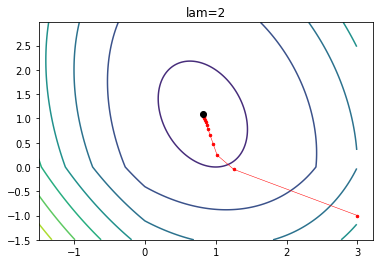

[[ 3.         -1.        ]
 [ 0.93599313  0.        ]
 [ 0.67942774  0.01016235]
 ...
 [ 0.63636364  0.18181818]
 [ 0.63636364  0.18181818]
 [ 0.63636364  0.18181818]]


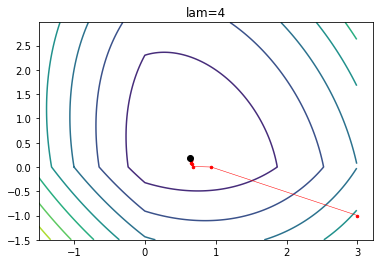

[[ 3.         -1.        ]
 [ 0.61845361  0.        ]
 [ 0.34684274  0.        ]
 ...
 [ 0.33333333  0.        ]
 [ 0.33333333  0.        ]
 [ 0.33333333  0.        ]]


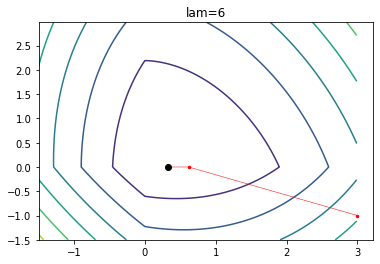

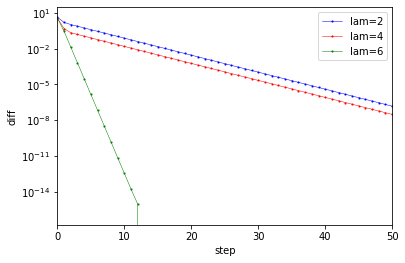

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

def st_ops(mu, q):
  x_proj = np.zeros(mu.shape)
  for i in range(len(mu)):
    if mu[i] > q:
      x_proj[i] = mu[i] - q
    else:
      if np.abs(mu[i]) < q:
        x_proj[i] = 0
      else:
        x_proj[i] = mu[i] + q; 
  return x_proj

def seq(lam):

  # dataset
  x_1 = np.arange(-1.5, 3, 0.01)
  x_2 = np.arange(-1.5, 3, 0.02)

  X1, X2 = np.mgrid[-1.5:3:0.01, -1.5:3:0.02]
  fValue = np.zeros((len(x_1), len(x_2)))

  A = np.array([[  3, 0.5],
                [0.5,   1]])
  mu = np.array([[1],
                [2]])

  for i in range(len(x_1)):
    for j in range(len(x_2)):
          inr = np.vstack([x_1[i], x_2[j]])
          fValue[i, j] = np.dot(np.dot((inr-mu).T, A), (inr- mu)) + lam * (np.abs(x_1[i]) + np.abs(x_2[j]))

  # cvx(function setting)
  w_lasso = cv.Variable((2,1))
  obj_fn = cv.quad_form(w_lasso - mu, A) +  lam * cv.norm(w_lasso, 1)
  objective = cv.Minimize(obj_fn)
  constraints = []
  prob = cv.Problem(objective, constraints)
  result = prob.solve(solver=cv.CVXOPT) 
  w_lasso = w_lasso.value

  plt.contour(X1, X2, fValue)

  x_init = np.array([[ 3],
                    [-1]])
  L = 1.01 * np.max(np.linalg.eig(2 * A)[0])

  # solve
  x_history = []
  xt = x_init
  for t in range(1000):
    x_history.append(xt.T)
    grad = 2 * np.dot(A, xt-mu)
    xth = xt - 1/L * grad
    xt = st_ops(xth, lam * 1 / L)

  # plot
  x_history = np.vstack(x_history)
  print(x_history)
  plt.plot(x_history[:,0],x_history[:,1],'ro-',markersize=2.5,linewidth=0.5)
  plt.plot(w_lasso[0],w_lasso[1],'ko')
  plt.title(f"lam={lam}")
  plt.show()

  tr = x_history.T
  x1 = tr[0]
  x2 = tr[1]
  x1 -=x1[len(x1) - 1]
  x2 -=x2[len(x2) - 1]
  x3 = np.abs(x1) + np.abs(x2)
  return x3

In [ ]:
a = seq(2)
b = seq(4)
c = seq(6)

plt.semilogy(a, 'bs-',label = 'lam=2',markersize=1,linewidth=0.5)
plt.semilogy(b, 'rs-',label = 'lam=4',markersize=1,linewidth=0.5)
plt.semilogy(c, 'gs-',label = 'lam=6',markersize=1,linewidth=0.5)
plt.xlabel("step")
plt.ylabel("diff")
plt.xlim(0,50)
plt.legend()
plt.show()

# PROBLEM 3

()


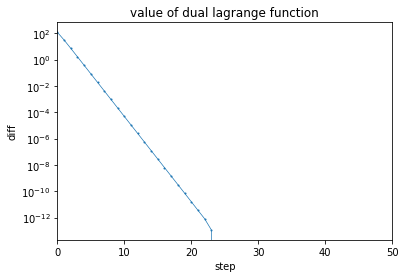

()


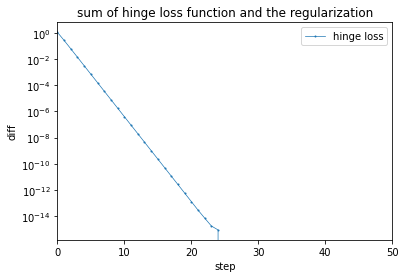

In [107]:
import cvxpy as cv
import numpy as np
import matplotlib.pyplot as plt


# data
np.random.seed(777)

n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)
lam = 0.1
steps = 100

x = np.random.randn(n, 2)
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

# solve
k = np.zeros((n,n))

for j in range(n):
  for i in range(n):
    k[i,j] = y[i]*y[j] * np.dot(x[i].T,x[j])

obj_history,loss_history = [],[]

alpha_t = np.random.randn(n)
for t in range(steps):
  grad = 1/2/lam * np.dot(k,alpha_t)-1
  alpha_th = alpha_t - 1/np.sqrt(t+1)*grad
  alpha_t  = 1 /(1 + np.exp(-alpha_t))
  w1hat = np.zeros(2)
  for i in range(n):
    w1hat += 1/2/lam * alpha_t[i] * y[i] * x[i]
  
  reg = lam * (np.linalg.norm(w1hat,2) + 1.0)
  ywx = 0
  for i in range(n):
    ywx += y[i] * np.dot(w1hat.T,x[i])
  hingeloss = 1.0 / n * np.sum(np.maximum(np.zeros(len(y)), 1 - ywx)) + reg
  obj_history.append(-1/4/lam*np.dot(np.dot(alpha_t.T,k),alpha_t) + np.dot(alpha_t.T,np.ones(n)))
  loss_history.append(hingeloss)
  
# alpha_history = np.vstack(alpha_history)
# w_history = np.vstack(w_history)
loss_history = np.vstack(loss_history)

plt.title("value of dual lagrange function")
tmp = obj_history[-1]
print(tmp.shape)
obj_history -= tmp*np.ones(len(obj_history))
obj_history = np.delete(obj_history,len(obj_history)-1)
plt.plot(np.arange(0, len(obj_history), 1), obj_history,marker="o",markersize=1,linewidth=0.7)
plt.xlim(0, 50)
plt.ylabel('diff')
plt.yscale('log')
plt.xlabel('step')
plt.show()

plt.title("sum of hinge loss function and the regularization")
tmp = loss_history[-1][0]
print(tmp.shape)
loss_history -= tmp*np.ones((len(loss_history),1))
loss_history = -1 * loss_history
loss_history = np.delete(loss_history,len(loss_history)-1)
plt.plot(np.arange(0, len(loss_history), 1), loss_history,marker="o",markersize=1,linewidth=0.7,label="hinge loss")
plt.xlim(0, 50)
plt.ylabel('diff')
plt.yscale('log')
plt.xlabel('step')
plt.legend()
plt.show()


# Problem 4

[[ 1.28971987e+00]
 [-3.43559461e-01]
 [-9.04366235e-09]
 [ 3.31991599e-10]]


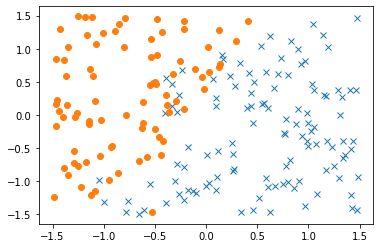

In [90]:
import cvxpy as cv
import numpy as np
import matplotlib.pyplot as plt

def st_ops(mu, q):
  x_proj = np.zeros(mu.shape)
  for i in range(len(mu)):
    if mu[i] > q:
      x_proj[i] = mu[i] - q
    else:
      if np.abs(mu[i]) < q:
        x_proj[i] = 0
      else:
        x_proj[i] = mu[i] + q; 
  return x_proj

# dataset 4
n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
y = (2 * x[:, 0] - 1 * x[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y = 2 * y -1
plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')

y = np.vstack(y)
lam = 0.1

# cvx
w = cv.Variable((4,1))
obj_fn = cv.sum(cv.pos(1 - cv.multiply(y,x @ w)))/n + lam * cv.norm(w,1)
objective = cv.Minimize(obj_fn)
prob = cv.Problem(objective)
result = prob.solve(solver=cv.CVXOPT)
w = w.value

print(w)
